In [1]:
# first time user of nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\12415\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\12415\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# ISOT Fake News Dataset Description

The dataset contains two types of articles fake and real News. This dataset was collected from real-
world sources; the truthful articles were obtained by crawling articles from Reuters.com (News
website). As for the fake news articles, they were collected from different sources. The fake news
articles were collected from unreliable websites that were flagged by Politifact (a fact-checking
organization in the USA) and Wikipedia. The dataset contains different types of articles on different
topics, however, the majority of articles focus on political and World news topics.
The dataset consists of two CSV files. The first file named “True.csv” contains more than 12,600
articles from reuter.com. The second file named “Fake.csv” contains more than 12,600 articles from
different fake news outlet resources. Each article contains the following information: article title, text,
type and the date the article was published on. To match the fake news data collected for kaggle.com,
we focused mostly on collecting articles from 2016 to 2017. The data collected were cleaned and
processed, however, the punctuations and mistakes that existed in the fake news were kept in the text

# Importing the Dataset From Google Drive

In [2]:
import pandas as pd
true_df = pd.read_csv('True.csv')
false_df = pd.read_csv('Fake.csv')

In [3]:
true_df.shape

(21417, 4)

In [4]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
true_df['text'].size

21417

In [6]:
false_df['text'].size

23481

In [7]:
count = 0
index = []
for line in range(true_df['text'].size):
    if '(Reuters) - ' not in true_df['text'][line]:
        count = count + 1
        index.append(line)
        continue
    str1, str2 = true_df['text'][line].split('(Reuters) - ', 1)
    true_df['text'][line] = str2
true_df = true_df.drop(true_df.index[index])
true_df = true_df.reset_index(drop=True)

In [8]:
count = 0
index = []
for line in range(true_df['subject'].size):
    if 'politicsNews' not in true_df['subject'][line]:
        count = count + 1
        index.append(line)
        continue
true_df = true_df.drop(true_df.index[index])
true_df = true_df.reset_index(drop=True)

In [9]:
true_df.shape

(11115, 4)

In [10]:
false_df.shape

(23481, 4)

### Testing the occurance of biased words

In [11]:
tcount = 0
index = []
for line in range(true_df['text'].size):
    if 'donald'.lower() in true_df['text'][line].lower():
        tcount = tcount + 1
        index.append(line)
        continue

In [12]:
fcount = 0
index = []
for line in range(false_df['text'].size):
    if 'donald'.lower() in false_df['text'][line].lower():
        fcount = fcount + 1
        index.append(line)
        continue

In [13]:
print("number of occurrance--> true: " + str(tcount) + " fake: " + str(fcount))

number of occurrance--> true: 7645 fake: 9298


In [14]:
count = 0
index = []
for line in range(false_df['subject'].size):
    if 'politics' not in false_df['subject'][line]:
        count = count + 1
        index.append(line)
        continue
false_df = false_df.drop(false_df.index[index])
false_df = false_df.reset_index(drop=True)

In [15]:
count

16640

In [16]:
false_df.head()

,title,text,subject,date
0,Democrat Senator Warns Mueller Not To Release ...,"According to The Hill, Democrat Senator Bob Ca...",politics,19-Feb-18
1,MSNBC ANCHOR Flabbergasted at What Texas Teach...,If we protect every other government building ...,politics,19-Feb-18
2,WATCH: SNOWFLAKES ASKED Communist Party Platfo...,Ami Horowitz is fantastic! Check out this man ...,politics,19-Feb-18
3,JUST IN: BADASS GENERAL JOHN KELLY Shoved Chin...,Just one more reminder of why President Trump ...,politics,18-Feb-18
4,DOJ’s JEFF SESSIONS Opens Investigation Into W...,Thank goodnesss Jeff Sessions is moving on fin...,politics,18-Feb-18


In [17]:
true_df['Label'] = '1'
false_df['Label'] = '0'
#adding label for true and false news
# 1 represent true articles
# 0 represent false articles

Label 1 represents the true articles and label 0 represents the false articles.

In [18]:
# Get dataframe information
# Represents the dimensionality of the dataframe
print('True Dataframe shape: ', true_df.shape)
print('False Dataframe shape: ', false_df.shape, '\n')
# Represents the axes of the dataframe
print('True Dataframe axes: ', true_df.axes)
print('False Dataframe axes: ', false_df.axes, '\n')
# Returns the dtypes in the dataframe
print('True Dataframe dtypes: ', true_df.dtypes)
print('False Dataframe dtypes: ', false_df.dtypes, '\n')
# Returns an int representing the number of elements in the dataframe
print('True Dataframe size: ', true_df.size)
print('False Dataframe size: ', false_df.size, '\n')

True Dataframe shape:  (11115, 5)
False Dataframe shape:  (6841, 5) 

True Dataframe axes:  [RangeIndex(start=0, stop=11115, step=1), Index(['title', 'text', 'subject', 'date', 'Label'], dtype='object')]
False Dataframe axes:  [RangeIndex(start=0, stop=6841, step=1), Index(['title', 'text', 'subject', 'date', 'Label'], dtype='object')] 

True Dataframe dtypes:  title      object
text       object
subject    object
date       object
Label      object
dtype: object
False Dataframe dtypes:  title      object
text       object
subject    object
date       object
Label      object
dtype: object 

True Dataframe size:  55575
False Dataframe size:  34205 



The data set is not balanced as the false dataframe has two thousand more than the true dataframe. I will balence it by oversampling the minority group using SMOTE.

In [19]:
true_df.subject.unique()

array(['politicsNews'], dtype=object)

In [20]:
false_df.subject.unique()

array(['politics'], dtype=object)

The subject in true and false dataset is not identical, and the date is not relevent to the authenticity of the news, so I will drop the columns subject and text.

In [21]:
df = pd.concat([true_df, false_df], ignore_index=True, sort=False)
df = df.drop(['subject', 'date'], axis=1)
df["text"] = df['title'] + df["text"] #join the title and text to a single column.
df = df.drop(['title'], axis=1)
df.head()

,text,Label
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1


In [22]:
print("Checking data qualitites...")
df.isnull().sum()
df.info()
print("check finished.")

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17956 entries, 0 to 17955
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    17956 non-null  object
 1   Label   17956 non-null  object
dtypes: object(2)
memory usage: 280.7+ KB
check finished.


# Text Pre-processing

In [23]:
import string
from nltk.corpus import stopwords
from matplotlib import pyplot as plt
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

In [24]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
porter = PorterStemmer()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]


# text processing analyzer used for TfidfVectorizer
def text_process(mess):
    text = [char for char in mess if char not in (string.punctuation + '；：’‘“”，。、《》？-=——+')] #eleminate the punctuation
    text = ''.join(text)
    text = tokenizer_porter(text) #Porter Stemming the text
    new_words= []#['reuter','said','us','republican','donald','trump','via','whi', 'america']
    stopwords_ = stopwords.words('english')
    for i in new_words:
        stopwords_.append(i)
    text = ' '.join(text)
    return [word for word in text.split() if word.lower() not in stopwords_] #eleminate the stopwords

In [25]:
stopwords.words('english')[0:10] # Show some stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [26]:
tfidf_transformer = TfidfVectorizer(lowercase=True, max_features = 1000, analyzer = text_process)
reviews = tfidf_transformer.fit_transform(df['text'])
print(reviews.shape)

(17956, 1000)


In [27]:
X = reviews.toarray()
y = df['Label'].astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14364, 1000) (14364,)
(3592, 1000) (3592,)


In [28]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 8879
Before OverSampling, counts of label '0': 5485 



In [29]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_res, y_train_res = oversample.fit_resample(X_train, y_train)
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of train_X: (17758, 1000)
After OverSampling, the shape of train_y: (17758,) 

After OverSampling, counts of label '1': 8879
After OverSampling, counts of label '0': 8879


In [30]:
def getScore(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    auc_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])                 #calculate the auc score
    recall = recall_score(y_test, y_pred)                                             #calculate the recall
    F1 = f1_score(y_test, y_pred)                                                     #calculate the F1-Score
    prec = precision_score(y_test, y_pred)                                            #calculate the Precision
    data = [auc_score, recall, F1, prec]
    return data

In [31]:
def getCrossScore(clf, X_test, y_test):

    auc_score = cross_val_score(clf, X_test, y_test, scoring='roc_auc')                 #calculate the auc score
    recall = cross_val_score(clf, X_test, y_test, scoring='recall')                                             #calculate the recall
    F1 = cross_val_score(clf, X_test, y_test, scoring='f1')                                                     #calculate the F1-Score
    prec = cross_val_score(clf, X_test, y_test, scoring='average_precision')                                            #calculate the Precision
    data = [auc_score, recall, F1, prec]
    return data
#['accuracy', 'adjusted_rand_score', 'average_precision', 'f1', 'log_loss', 'mean_absolute_error', 'mean_squared_error', 'precision', 'r2', 'recall', 'roc_auc']

In [32]:
table = pd.DataFrame(columns = ['AUC Score', 'Recall','F1-Score','Precision'])

# Training

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, roc_auc_score, roc_curve

## Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier
#best_n = GridSearchCV(DecisionTreeClassifier(), { 
#    'criterion': ['gini','entropy'],
#    'max_depth': range(1,10),
#    'min_samples_split': range(2,10),
#    'min_samples_leaf': range(1,5)
#}, scoring=make_scorer(accuracy_score))
#best_n.fit(X_train_res, y_train_res)

In [35]:
#best_n.best_params_

In [36]:
dtc = DecisionTreeClassifier(criterion = 'entropy',max_depth= 9,min_samples_leaf= 3, min_samples_split = 3)

In [37]:
dtc.fit(X_train_res, y_train_res)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=3,
                       min_samples_split=3)

In [38]:
from sklearn import tree
text_representation = tree.export_text(dtc)
#print(text_representation)

In [111]:
fig = plt.figure(figsize=(250,150))
_ = tree.plot_tree(dtc, 
                   max_depth = 6,
                   feature_names = tfidf_transformer.get_feature_names(),
                   filled=True)
plt.savefig('tree.png',format='png',bbox_inches = "tight")

In [107]:
plt.show()

In [49]:
y_pred = dtc.predict(X_test)
table.loc['Decision Tree'] = getScore(dtc, X_test, y_test)

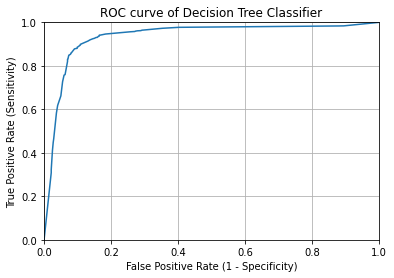

In [51]:
fpr, tpr, threshol = roc_curve(y_test, dtc.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve of Decision Tree Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

## Linear Support Vector Machine

In [52]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

In [53]:
#best_n = GridSearchCV(LinearSVC(max_iter = 2000), { 
#    'C': [1, 2, 3, 4, 5, 6, 7, 10] 
#}, scoring=make_scorer(accuracy_score))
#best_n.fit(X_train_res, y_train_res)
#print(best_n.best_params_)
#SVM_model = CalibratedClassifierCV(best_n) 
#SVM_model.fit(X_train_res, y_train_res)

In [54]:
SVM_model = LinearSVC(C = 1, random_state=0, max_iter = 2000)
SVM_model = CalibratedClassifierCV(SVM_model) 
SVM_model.fit(X_train_res, y_train_res)

CalibratedClassifierCV(base_estimator=LinearSVC(C=1, max_iter=2000,
                                                random_state=0))

In [55]:
#y_pred = SVM_model.predict(X_test)
table.loc['Support Vector Machine'] = getScore(SVM_model, X_test, y_test)

In [56]:
#y_scores = cross_val_score(SVM_model, X, y, scoring='accuracy')
#print('Cross-validated accuracy scores: ', y_scores)
#print('Mean cross-validated accuracy scores: ', y_scores.mean())

#y_scores_auc = cross_val_score(SVM_model, X, y, scoring='roc_auc')
#print('Cross-validated auc scores: ', y_scores_auc)
#print('Mean cross-validated auc scores: ', y_scores_auc.mean())

I plan to do cross-validatation but it turns out that it will just run forever bacause of the huge amount of the parameters.

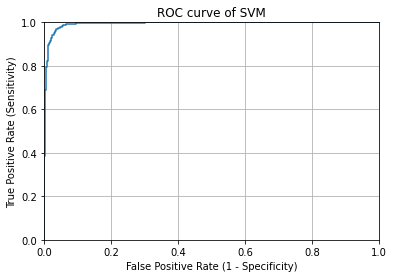

In [57]:
fpr, tpr, thresholds = roc_curve(y_test, SVM_model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve of SVM')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

## Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
log_model = LogisticRegression()
log_model.fit(X_train_res, y_train_res)

LogisticRegression()

In [59]:
y_scores_log = cross_val_score(log_model, X, y, scoring='accuracy')
print('Cross-validated accuracy scores: ', y_scores_log)
print('Mean cross-validated accuracy scores: ', y_scores_log.mean())

y_scores_log_auc = cross_val_score(log_model, X, y, scoring='roc_auc')
print('Cross-validated auc scores: ', y_scores_log_auc)
print('Mean cross-validated auc scores: ', y_scores_log_auc.mean())

Cross-validated accuracy scores:  [0.95183742 0.95989975 0.95572264 0.95265943 0.94848232]
Mean cross-validated accuracy scores:  0.953720309806935
Cross-validated auc scores:  [0.99081684 0.99146253 0.99272426 0.99026361 0.98558695]
Mean cross-validated auc scores:  0.9901708358765833


In [60]:
#y_pred = log_model.predict(X_test)
table.loc['Logistic Regression'] = getScore(log_model, X_test, y_test)

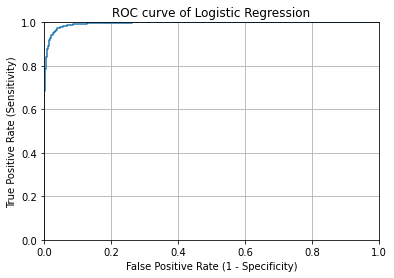

In [61]:
fpr, tpr, thresholds = roc_curve(y_test, log_model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve of Logistic Regression')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

## Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

rndm = RandomForestClassifier(max_depth=2, random_state=0)

'''
rndm = GridSearchCV(RandomForestClassifier(random_state=0, ), { 
 'bootstrap': [True, False],
 'max_depth': [10, 30, 50, 70, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]
}, scoring=make_scorer(accuracy_score))
'''

rndm.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=2, random_state=0)

In [63]:
y_scores = cross_val_score(rndm, X, y, scoring='accuracy')
print('Cross-validated accuracy scores: ', y_scores)
print('Mean cross-validated accuracy scores: ', y_scores.mean())

y_scores_auc = cross_val_score(rndm, X, y, scoring='roc_auc')
print('Cross-validated auc scores: ', y_scores_auc)
print('Mean cross-validated auc scores: ', y_scores_auc.mean())

Cross-validated accuracy scores:  [0.70684855 0.76747424 0.81648566 0.78780284 0.77777778]
Mean cross-validated accuracy scores:  0.77127781406002
Cross-validated auc scores:  [0.91452844 0.95479855 0.966309   0.95131342 0.92696125]
Mean cross-validated auc scores:  0.9427821317333059


In [64]:
#y_pred = rndm.predict(X_test)
table.loc['Random Forest'] = getScore(rndm, X_test, y_test)

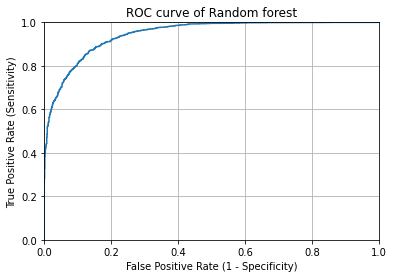

In [65]:
fpr, tpr, thresholds = roc_curve(y_test, rndm.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve of Random forest')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

## Naive Bayes

sklearn has three Naive Bayes methods, Gaussian NB, MultiNomial NB and Bernoulli NB. I chose Multinomial because it is good for the features with discrete values like word count.

In [66]:
from sklearn.naive_bayes import MultinomialNB
NaiBay = MultinomialNB()
NaiBay.fit(X_train_res, y_train_res)

MultinomialNB()

In [67]:
#y_pred = NaiBay.predict(X_test)
table.loc['Naive Bayes'] = getScore(NaiBay, X_test, y_test)

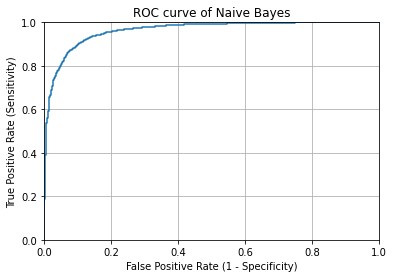

In [68]:
fpr, tpr, thresholds = roc_curve(y_test, NaiBay.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve of Naive Bayes')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

Not as good as the previous models.

### K Nearest Neighbors

In [69]:
'''
best_n = GridSearchCV(KNeighborsClassifier(), { 
    'n_neighbors': [1, 2, 3, 5, 7, 10, 12, 15, 17, 20] 
}, scoring=make_scorer(accuracy_score))
best_n.fit(X_train_res, y_train_res)
best_n.best_params_
'''

"\nbest_n = GridSearchCV(KNeighborsClassifier(), { \n    'n_neighbors': [1, 2, 3, 5, 7, 10, 12, 15, 17, 20] \n}, scoring=make_scorer(accuracy_score))\nbest_n.fit(X_train_res, y_train_res)\nbest_n.best_params_\n"

In [70]:
#KNclf = KNeighborsClassifier(n_neighbors = 20)
#KNclf.fit(X_train_res, y_train_res)
k_range = list(range(1, 10))
param_grid = dict(n_neighbors=k_range)
best_n = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='recall', return_train_score=False,verbose=1)
KNclf = best_n.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [71]:
KNclf.best_params_

{'n_neighbors': 1}

In [72]:
#y_pred = KNclf.predict(X_test)
table.loc['K-nearest Neighbors'] = getScore(KNclf, X_test, y_test)

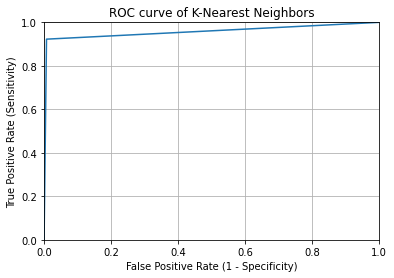

In [73]:
fpr, tpr, thresholds = roc_curve(y_test, KNclf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve of K-Nearest Neighbors')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

Bad model

In [74]:
table

,AUC Score,Recall,F1-Score,Precision
Decision Tree,0.934446,0.919499,0.918267,0.917038
Support Vector Machine,0.993361,0.979875,0.974861,0.969898
Logistic Regression,0.994430,0.974255,0.974695,0.975136
Random Forest,0.945475,0.865402,0.888271,0.912381
Naive Bayes,0.962570,0.912376,0.919436,0.926606
K-nearest Neighbors,0.957754,0.922764,0.957581,0.995129


# Ensemble Models

In [75]:
from sklearn.ensemble import VotingClassifier
final_model = VotingClassifier(estimators=[('svm', SVM_model), ('log_model', log_model)],voting='soft')
final_model.fit(X_train_res, y_train_res)
table.loc['Ensemble Model'] = getScore(final_model, X_test, y_test)

In [76]:
table

,AUC Score,Recall,F1-Score,Precision
Decision Tree,0.934446,0.919499,0.918267,0.917038
Support Vector Machine,0.993361,0.979875,0.974861,0.969898
Logistic Regression,0.994430,0.974255,0.974695,0.975136
Random Forest,0.945475,0.865402,0.888271,0.912381
Naive Bayes,0.962570,0.912376,0.919436,0.926606
K-nearest Neighbors,0.957754,0.922764,0.957581,0.995129
Ensemble Model,0.996450,0.982836,0.979959,0.977099


# Evaluate news

In [77]:
#SVM_model, mlp_model, NaiBay, rndm, log_model, dtc
loaded_model = final_model
def evaluate(mess):
    text = [char for char in mess if char not in string.punctuation] #eleminate the punctuation
    text = ''.join(text)
    text = tokenizer_porter(text) #Porter Stemming the text
    text = ' '.join(text)
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')] #eleminate the stopwords
    text = ' '.join(text)
    text = [text]
    reviews = tfidf_transformer.transform(text)
    reviews = reviews.toarray()
    prediction = loaded_model.predict(reviews)
    
    if prediction[0] == 0:
        print("Prediction of the News :  Looking Fake⚠ News📰 ")
    else:
        print("Prediction of the News : Looking Real News📰 ")

Some sample article from internet.

In [78]:
somenews = "should be permitted to explore?€? courtrooms and allowed to ?€?sit in all locations, (including, especially, the judge?€?s bench and the witness stand).?€?  The new guidance says such explorations should take place only ?€?to the extent that resources and time permit?€? and specifically puts the judge?€?s bench off limits. The new memo also warns judges to be skeptical, since an unaccompanied minor ?€?generally receives more favorable treatment under the law than other categories of illegal aliens,?€? which creates ?€?an incentive to misrepresent accompaniment status or age in order to attempt to qualify for the benefits.?€? It also says to be on the lookout for ?€?fraud and abuse,?€? language that was not in the previous memo. Immigration judges are appointed by the U.S. Attorney General and courts are part of the Department of Justice, not an independent branch. The only sitting immigration judges routinely allowed to speak to the media are representatives of their union, the National Association of Immigration Judges.  Dana Marks, a sitting judge and spokeswoman for the union, said the ?€?overall tone?€? of the memo ?€?is very distressing and concerning to immigration judges.?€?  ?€?There is a feeling that the immigration courts are just being demoted into immigration enforcement offices, rather than neutral arbiters,?€? Marks said. ?€?There has been a relentless beating of the drum toward enforcement rather than due process.?€?   Former immigration judge Andrew Arthur, who now works at the Center for Immigration Studies, which promotes lower levels of immigration overall, said the new guidelines were needed.  In their previous form, he said, ?€?so much emphasis was placed on the potential inability of the alien to understand the proceedings ... that it almost put the judge into the position of being an advocate.?€???  The courts have had to handle a surge in cases for unaccompanied minors, mostly from Central America, after their numbers sky-rocketed in 2014 as violence in the region caused residents to flee north.  While illegal crossings initially fell after Trump took office, U.S. Customs and Border Protection said that since May, each month has seen an increase in children being apprehended either alone or with family members.  Attorney General Jeff Sessions said in a speech in Boston in September that the special accommodations for unaccompanied minors had been exploited by ?€?gang members who come to this country as wolves in sheep clothing.?€? Echoing some of these concerns, the new memo notes in a preamble that not all child cases involve innocents, and that the courts might see ?€?an adolescent gang member?€? or ?€?a teenager convicted as an adult for serious criminal activity.?€?  Jennifer Podkul, policy director of Kids in Need of Defense (KIND) said Congress included special procedural protections for immigrant children in a 2008 anti-trafficking bill to ?€?make sure that a kid gets a fair shot in the courtroom.?€? ?€?These kids are by themselves telling a very complicated and oftentimes very traumatic story,?€? said Podkul. ?€?The approach of this memo, which is much more suspicious, is not going to help get to the truth of a child?€?s story.?€?  In cases where children are called to testify, the old guidance instructed judges to ?€?seek to limit the amount of time the child is on the stand.?€? The new guidance says that judges should ?€?consider?€? limiting the child?€?s time on the stand ?€?without compromising due process for the opposing party,?€? which is generally a government prosecutor. The memo leaves in a range of special accommodations made for children, including allowing them to bring a pillow or booster seat or a ?€?toy, book, or other personal item.?€? It also maintains that cases involving unaccompanied minors should be heard on a separate docket when possible and that children should not be detained or transported with adults. "

In [79]:
somenews2 = "LexisNexis, a provider of legal, regulatory and business information, said on Tuesday it had withdrawn two products from the Chinese market in March this year after it was asked to remove some content.  The issue of academic freedom in China hit the headlines this week after the leading British academic publisher,  Cambridge University Press, said it had complied with a request to block online access to some scholarly articles in China.  It later reversed its position.   Earlier this year LexisNexis Business Insight Solutions in China was asked to remove some content from its database,  LexisNexis said in a statement.  In March 2017, the company withdrew two products (Nexis and LexisNexis Academic) from the Chinese market.  LexisNexis is owned by information group Relx. "

In [80]:
evaluate(somenews)

Prediction of the News : Looking Real News📰 


In [81]:
evaluate(somenews2)

Prediction of the News : Looking Real News📰 


In [82]:
somenews3 = "Florida Gov. Ron DeSantis is on the brink of notching several wins as the Florida legislature convenes for a special session Tuesday to finalize the state's redistricting process.Not only is his controversial redistricting plan that heavily benefits Republicans likely to pass, but he also has a chance to target a company he is having a political dispute with -- Walt Disney World.The process to redraw Florida's 28 congressional districts has proven contentious. After submitting his own redistricting proposal and then ultimately vetoing the map passed by both chambers of the Florida legislature earlier this spring, DeSantis called a special session to consider a new map put forward by his advisers. It slashes the number of Black districts in half from four to two and eliminates Florida's 5th District, which stretches in North Florida from Tallahassee to Jacksonville and is represented in Congress by a Black Democrat -- Rep. Al Lawson.DeSantis has claimed such districts, and Lawsons in particular, have been racially gerrymandered, and he has vowed that any map supported by his office would be race-neutral.During a press conference last week, DeSantis justified the elimination of Florida's 5th District while noting the map, if passed, would likely face some sort of legal challenge.We are not going to have a 200-mile gerrymander that divvies up people based on the color of their skin. That is wrong,DeSantis said. That is not the way weve governed in the state of Florida and so that will be that. And obviously, that will be litigated.DeSantis proposed map also splits up Black voters around the Orlando area and proposes the creation of 18 Republican-leaning and eight Democrat-leaning seats, which, if passed, would effectively eliminate Democrats' national redistricting advantage and threaten their slim majority in the House of Representatives.Lawmakers could vote on the proposal as early as Tuesday afternoon, which would mean it could pass both chambers by Wednesday, leaving little time for opposition. Legislators, however, have all week to remain in special session if they wish.Black lawmakers and voting rights activists across the state say the latest map tramples on the rights of Black voters.Lawson, one of the Black legislators likely to lose his seat in DeSantis preferred configuration, called the governors plan a continued scheme by DeSantis to erase minority access districts in Congress in order to create more seats for the Republican party.""DeSantis is doing a disservice to Florida voters by playing partisan politics. This latest map clearly violates the Voting Rights Act as well as the U.S. and Florida Constitutions, Lawson added in a statement.On MSNBC, state Rep. Kamia Brown said DeSantis proposal is blatant gerrymandering.Florida Governor Ron DeSantis speaks at the Conservative Political Action Conference (...These maps are not what Florida looks like. He has taken away 50% of Black representation.Members of major voting rights and Black advocacy groups, including the NAACP, joined​​ hundreds of protestors, including members of the state legislature, outside the Florida State Capitol in Jacksonville on Tuesday morning to slam DeSantis and his party for actively working to strip Floridians freedoms through deliberate and uncalled for attacks on Black voters representation in government.Adding to the controversy surrounding the governor is the additional item DeSantis put forward for consideration hours before the special session was set to begin. That measure would put an end to special administrative districts implemented before 1968, including the Reedy Creek Improvement District, otherwise known as the governing and special tax district for one of DeSantis most high-profile targets: Walt Disney World.ABC News is owned by The Walt Disney Company, which also owns Walt Disney World.DeSantis has previously signaled support for legislation that would eliminate Disneys district.I was shocked to see some of the stuff thats in there, said DeSantis during a press conference earlier this Spring. They can do their own nuclear power plant. Is there any other private company in the state that can just build a nuclear power plant? They're able to do certain things that nobody else is able to do.Gwendolyn Waldorf, from Tallahassee, holds a sign at a rally against Gov. Ron DeSantis' r...Disney's status became the subject of DeSantis' public scrutiny recently after the media conglomerate criticized Florida's highly controversial Parental Rights in Education Law, dubbed by critics as the Don't Say Gay law, vowing to help repeal it.Florida's HB 1557, also known as the 'Don't Say Gay' bill, should never have passed and should never have been signed into law. Our goal as a company is for this law to be repealed by the legislature or struck down in the courts, and we remain committed to supporting the national and state organizations working to achieve that. We are dedicated to standing up for the rights and safety of LGBTQ+ members of the Disney family, as well as the LGBTQ+ community in Florida and across the country, said a Disney spokesperson at the time."

In [83]:
evaluate(somenews3)

Prediction of the News : Looking Real News📰 


In [84]:
clickHoleNews = "From Tesla to SpaceX, Elon Musk has been one of the leading innovators of our age—a modern-day Thomas Edison ushering mankind toward a better future. And now, he’s once again proven himself as one of the most brilliant minds of the 21st century: Musk just stuck a guitar cable into a dolphin’s brain and had Carlos Santana play a solo into it and the dolphin died instantly. Incredible! A true visionary unlike anyone else alive right now.This morning, at a hastily arranged press conference, an energetic Musk took the stage alongside a large, wet object that was audibly wheezing beneath a tarp. Musk then excitedly announced that he’d devised his most extraordinary innovation yet, one that would change the world forever, at which point he then dramatically pulled the tarp away, revealing a weak and dying dolphin gasping pitifully on the stage floor. The crowd then instantly burst into applause, only to moments later be brought to a fever pitch as Musk welcomed 74-year-old music legend Carlos Santana on stage.  The guitar icon waved to the crowd as he strode out to join Musk, after which he picked up an electric guitar and then labored to plug it into the dolphin’s brain, struggling mightily to jam the cable into the animal’s dense skull as it shrieked and thrashed about. Once the guitar cable was firmly inserted into the dolphin’s brain, Santana turned to the audience, closed his eyes, and began passionately soloing. Though the audience couldn’t hear Santana’s shredding at all, seeing that the guitar was connected to an animal’s brain instead of an amplifier, everyone quickly understood the profound effect Santana’s guitar playing had on the dolphin, as within moments its panicked cries and convulsions quieted, its body suddenly limp and unmoving. As Santana continued playing, the dolphin’s vital signs, which were being monitored in real-time on a large screen behind Musk, soon flatlined entirely, prompting the audience to erupt into a full-on standing ovation. Musk then walked over to the lifeless dolphin and raised his arms in triumph, clearly proud to have once again ushered in a world-changing innovation.“With just an electric guitar and a dolphin, today we have entered a new technological age, bringing humanity into an uncharted frontier where the instruments of man come together with the most intelligent of animals, leading us to a brighter tomorrow unlike anything previously imagined!” shouted Musk over the crowd’s deafening applause, jabbing the unbreathing dolphin with a mop handle to demonstrate that it was no longer alive. “After today, anyone with access to a dolphin and a guitar can re-create exactly what happened here on this stage, and can do so knowing the dolphin will die every time! Anything you dream is now possible, and this dolphin is proof. The future is here, and it is in your hands!”Within minutes of the news breaking about Santana killing the dolphin with a guitar solo, stocks for Neuralink, Tesla, SpaceEx and Dogecoin all skyrocketed, confirming the public’s reinvigorated confidence in Musk’s entrepreneurial genius.How unbelievably cool! We literally had to double-check if it was the year 2022 or 3022, because it sure does feel like the future has arrived! Only a visionary of Musk’s caliber could single-handedly usher in a new technological era like this. Here’s to you, Elon! We can’t wait to see what you invent next!"

In [85]:
evaluate(clickHoleNews)

Prediction of the News :  Looking Fake⚠ News📰 
